In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data_to_load, encoding="ISO-8859-1")
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load, encoding="ISO-8859-1")
# Combine the data into a single dataset

combine_df = pd.merge(mouse_drug_df, clinical_trial_df, on="Mouse ID", how = "outer")


# Display the data table for preview
combine_df.head(10)


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
5,f234,Stelasyn,25,52.178602,2
6,f234,Stelasyn,30,56.873817,2
7,f234,Stelasyn,35,57.748758,2
8,x402,Stelasyn,0,45.000000,0
9,x402,Stelasyn,5,46.327570,1


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

grouped_mean= combine_df.groupby(['Drug','Timepoint'],  as_index=False)

# Convert to DataFrame

mean_df = pd.DataFrame(grouped_mean["Tumor Volume (mm3)"].mean())

# Preview DataFrame
mean_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_data=combine_df.groupby(['Drug','Timepoint'],as_index=False)

# Convert to DataFrame
sem_df=pd.DataFrame(sem_data["Tumor Volume (mm3)"].agg(sem))

# Preview DataFrame

sem_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
refitted_mean_df= pd.DataFrame(pd.DataFrame.pivot(mean_df, index="Timepoint", columns = "Drug", values="Tumor Volume (mm3)"))
# Preview that Reformatting worked
refitted_mean_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
refitted_sem=pd.DataFrame.pivot(sem_df, index="Timepoint", columns = "Drug", values="Tumor Volume (mm3)")
refitted_sem_df=pd.DataFrame(refitted_sem)
refitted_sem_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


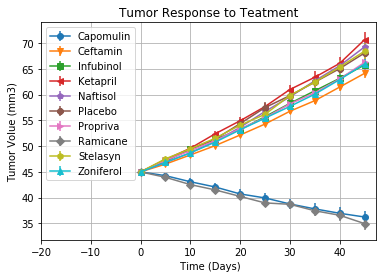

In [6]:
col=refitted_mean_df.columns
markers=["o", "v", "s", "<", "p", "8",">", "D", "h", "^"]
markerreference=0
# Generate the Plot (with Error Bars)
for x in col:
    plt.errorbar(refitted_mean_df.index, refitted_mean_df[x], yerr=refitted_sem_df[x], marker=markers[markerreference])
    markerreference=markerreference+1
#update x scale to allow for ledgend not to overlap data
plt.xlim(left = -20)
# labeling plot    
plt.legend(labels = col, loc = 'best' )
plt.xlabel(" Time (Days)")
plt.ylabel("Tumor Volue (mm3)")
plt.title("Tumor Response to Teatment")
plt.grid()

# Save the Figure
plt.savefig("../Images/Tumor-Response-to-Teatment.png")
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# 

grouped_metmean= combine_df.groupby(['Drug','Timepoint'],  as_index=False)

# Convert to DataFrame

metmean_df = pd.DataFrame(grouped_mean["Metastatic Sites"].mean())

# Preview DataFrame
metmean_df.head()
# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

metsem_data=combine_df.groupby(['Drug','Timepoint'],as_index=False)

# Convert to DataFrame
metsem_df=pd.DataFrame(metsem_data["Metastatic Sites"].agg(sem))

# Preview DataFrame

metsem_df.head()
# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [9]:
# Minor Data Munging to Re-Format the Data Frames
refitted_metmean_df= pd.DataFrame(pd.DataFrame.pivot(metmean_df, index="Timepoint", columns = "Drug", values="Metastatic Sites"))
# Preview that Reformatting worked
refitted_metmean_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [10]:
# Minor Data Munging to Re-Format the Data Frames
refitted_metsem_df= pd.DataFrame(pd.DataFrame.pivot(metsem_df, index="Timepoint", columns = "Drug", values="Metastatic Sites"))
# Preview that Reformatting worked
refitted_metsem_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


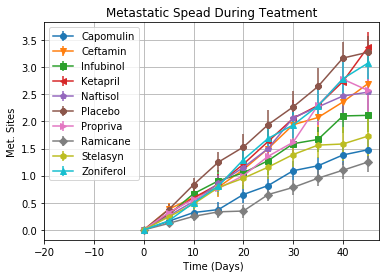

In [11]:
col=refitted_mean_df.columns
markers=["o", "v", "s", "<", "p", "8",">", "D", "h", "^"]
markerreference=0
# Generate the Plot (with Error Bars)
for x in col:
    plt.errorbar(refitted_metmean_df.index, refitted_metmean_df[x], yerr=refitted_metsem_df[x], marker=markers[markerreference])
    markerreference=markerreference+1
#update x scale to allow for ledgend not to overlap data
plt.xlim(left = -20)
# labeling plot    
plt.legend(labels = col, loc = 'best' )
plt.xlabel(" Time (Days)")
plt.ylabel("Met. Sites")
plt.title("Metastatic Spead During Teatment")
plt.grid()

# Save the Figure
plt.savefig("../Images/Metastatic-Spead-During-Treatment.png")
# Show the Figure
plt.show()

## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_groupby=combine_df.groupby(['Drug','Timepoint'],  as_index=False)
# Convert to DataFrame
mice_df=pd.DataFrame(mice_groupby["Mouse ID"].count())
mice_df=mice_df.rename(columns={'Mouse ID': 'Mouse Count'})
# Preview DataFrame
mice_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [13]:
# Minor Data Munging to Re-Format the Data Frames
refitted_mice_df= pd.DataFrame(pd.DataFrame.pivot(mice_df, index="Timepoint", columns = "Drug", values="Mouse Count"))
# Preview the Data Frame
refitted_mice_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


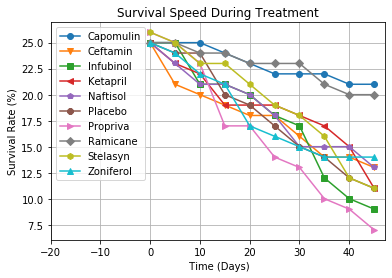

In [14]:
col=refitted_mean_df.columns
markers=["o", "v", "s", "<", "p", "8",">", "D", "h", "^"]
markerreference=0
# Generate the Plot (with Error Bars)
for x in col:
    plt.errorbar(refitted_mice_df.index, refitted_mice_df[x],  marker=markers[markerreference])
    markerreference=markerreference+1
#update x scale to allow for ledgend not to overlap data
plt.xlim(left = -20)
# labeling plot    
plt.legend(labels = col, loc = 'best' )
plt.xlabel(" Time (Days)")
plt.ylabel("Number mice alive")
plt.title("Survival Speed During Treatment")
plt.grid()

# Save the Figure
plt.savefig("../Images/Survival_Speed_During_Treatment.png")
# Show the Figure
plt.show()

## Summary Bar Graph

In [15]:
datastart=[]
dataend=[]
col=refitted_mean_df.columns
colset=[]
for index, row in refitted_mean_df.iterrows():
    for c in col:
        
        if index==0:
            datastart.append(row[c])
            
        elif index == 45:

                dataend.append(row[c])
                colset.append(c)


new_df=pd.DataFrame({
    "Drug": colset,
    "inital":datastart,
    "end": dataend
    })
# Calculate the percent changes for each drug
new_df["% change"]=((new_df["end"]-new_df["inital"])/new_df["inital"])*100
new_df["% change"]=new_df["% change"].round(2)




# Display the data to confirm
new_df.head()


,Drug,inital,end,% change
0,Capomulin,45.0,36.236114,-19.48
1,Ceftamin,45.0,64.132421,42.52
2,Infubinol,45.0,65.755562,46.12
3,Ketapril,45.0,70.662958,57.03
4,Naftisol,45.0,69.265506,53.92


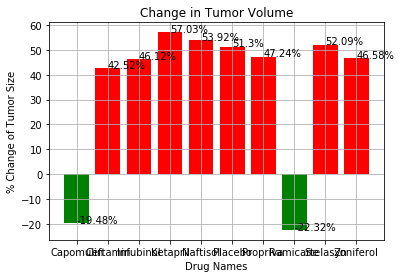

In [16]:
# Store all Relevant Percent Changes into a Tuple
# Splice the data between passing and failing drugs
# Use functions to label the percentages of changes
percentchange=new_df[{'Drug', '% change'}]
for row in new_df.iterrows():
    if row[1]["% change"]>=0:
        plt.bar(x=row[1]["Drug"], height=row[1]["% change"], width=0.8, color = "red")
        plt.text(x=row[1]["Drug"], y=row[1]["% change"], s=f'{row[1]["% change"]}%')
    else:
        plt.bar(x=row[1]["Drug"], height=row[1]["% change"], width=0.8, color = "green")
        plt.text(x=row[1]["Drug"], y=row[1]["% change"], s=f'{row[1]["% change"]}%')

                 # Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]

 
fig_size[0] = 15
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.grid()
# Orient widths. Add labels, tick marks, etc. 

plt.xlabel("Drug Names")
plt.ylabel("% Change of Tumor Size")
plt.title("Change in Tumor Volume")





# Save the Figure
plt.savefig("../Images/ChangeInTumorVolume.png")

# Show the Figure
plt.show()